# Polynomial Regression using Gradient Descent, Least Squares, and Ridge Regression

The point of this workbook is to create a line and add fake noise, then solve for the true line using gradient descent while applying ridge regression. 

Few changes here from our simple linear regression using gradient descent workbook:
 - Added a few features (squared and 3rd degree polynomials)
 - coefficient updates follow the ridge formulas which can be seen below

Ridge Regression algorithm can be found in Week4 "Approach 2: gradient descent" video.
<img src="https://github.com/yeamusic21/Coursera-Machine-Learning-Specialization-Extra-Assignments/blob/master/Regression/img/ridge_algorithm.PNG?raw=true">

The only difference I use from the above algorithm is the convergence criteria where I'm looking for a small difference between the current RSS and previous RSS prior to the latest coefficient update.

In Part1 we solve using little to no L2 regularization and in Part2 we turn up the L2 regularization and the hope is we witness smaller coefficients.

## Part 1:

## Create Some Fake Data to Fit

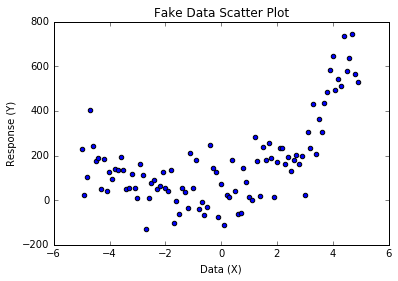

In [36]:
#### CREATE FAKE DATA

# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# simulate some data
column1 = np.repeat(1, 100)
column2 = np.arange(-5,5,.1)
column3 = (column2**2)/1
column4 = (column2**3)/10
column5 = (column2**4)/100
X = np.matrix([column1,column2,column3,column4,column5])
X = X.transpose()
# make up some parameters
B = np.matrix(np.array([20.345,20.961,15.109,10.432,6.657]))
B = B.transpose()
# create some fake noise
e = np.matrix(np.random.normal(0, 100, 100))
e = e.transpose()
# finally, create fake response data
Y = X*B + e

# plot our fake data to make sure it looks as we would expect (linear relationship with noise)
plt.scatter(X[:,1], Y)
plt.title('Fake Data Scatter Plot')
plt.xlabel("Data (X)")
plt.ylabel("Response (Y)")
plt.show()

So we have a lot of noise here and our true coefficients are on the larger side.  This should make for a nice dataset for playing with ridge regression.  The flexiblity and large coefficients we used to create the data should hopefully result in a final model with large coefficients.  Then we can use our ridge regression parameter to soften our coefficients.  The large noise we put in the model should give us room to soften our coefficients.

## Solve For Coefficients Using Gradient Descent & Least Squares

### First we're going to use a low value for L2 regularization

The estimated Coefficients are:
[[ 40.89516187]
 [ 21.67248177]
 [ 13.93094776]
 [ 12.894458  ]
 [ 12.85128087]]
The true Coefficients are:
[[ 20.345]
 [ 20.961]
 [ 15.109]
 [ 10.432]
 [  6.657]]


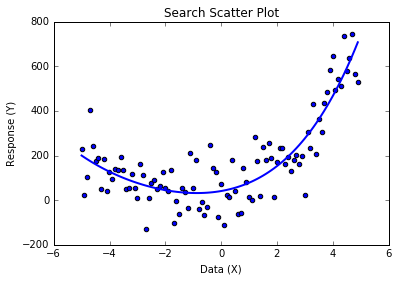

total iterations to convergence:
254753
total minutes to convergence:
0.745299998919


In [49]:
#### SOLVE FOR COEFFICIENTS USING GRADIENT DESCENT & LEAST SQUARES

import time
t0 = time.time()

# set N = size of dataset
N = X[:,1].size
N = float(N)

# initialize coefficients 
Bhat = np.matrix(np.array([1.0,1.0,1.0,1.0,1.0]))
Bhat = Bhat.transpose()
# initialize convergence flag
convergence_flag = 0
# initalize iteration counter
iterations = 0
# Set learning Rate
learning_rate = 1e-4
# Set L2 regularization
L2 = 0.1
# save RSS history
RSS_history = []

# Gradient Descent
while (convergence_flag == 0):
    iterations = iterations + 1
    # compute RSS   
    residuals = Y-(X*Bhat)
    RS = np.square(residuals)
    RSS = RS.sum()
    # update coefficients:
    # intercept
    residuals = Y-(X*Bhat)
    derivative = residuals.sum()
    Bhat[0,:] = Bhat[0,:] + (1/(2*N))*(learning_rate)*(derivative)
    for i in range(1,len(Bhat)):
        derivative = residuals.transpose()*X[:,i]
        Bhat[i,:] = (1-2*learning_rate*L2)*Bhat[i,:] + (learning_rate)*(derivative)   
    # check for convergence
    # compute RSS   
    residuals = Y-(X*Bhat)
    RS = np.square(residuals)
    RSS_new = RS.sum()
    if (abs(RSS_new-RSS)<0.001):
        convergence_flag = 1
    RSS_history.append(RSS)

# print estimated coefficients     
print "The estimated Coefficients are:"
print Bhat
# print true coefficients
print "The true Coefficients are:"
print B

plt.scatter(X[:,1], Y)
plt.plot(X[:,1], X*Bhat, linewidth=2.0)
plt.title('Search Scatter Plot')
plt.xlabel("Data (X)")
plt.ylabel("Response (Y)")
plt.show()

print "total iterations to convergence:"
print iterations

t1 = time.time()
total = t1-t0
print "total minutes to convergence:"
print total/60.0

So it looks like our coefficients are large as we wanted and close enough to our true coefficients given the noise we added.  Looking at the scatter plot, things look good!

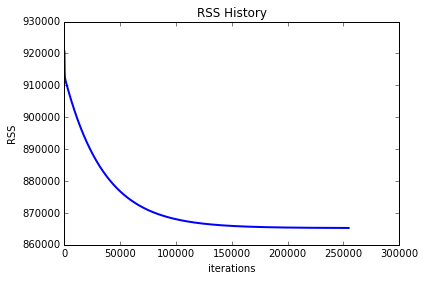

In [58]:
plt.plot(range(0,iterations-100), RSS_history[100:], linewidth=2.0)
plt.title('RSS History')
plt.xlabel("iterations")
plt.ylabel("RSS")
plt.show()

Thought I would add a RSS history plot just for kicks.  :-).  I removed the first 100 observations from the history because we start off so far away from our optimal solution that thouse RSS values were so big they completely distorted the plot.

## Part 2: 

## Solve For Coefficients Using Gradient Descent & Least Squares

### Now we're going to use a larger value for L2 regularization and our new coefficients should be smaller.

The estimated Coefficients are:
[[ 42.2257499 ]
 [  7.13298226]
 [ 13.36005023]
 [ 10.87092728]
 [  2.50140099]]
The true Coefficients are:
[[ 20.345]
 [ 20.961]
 [ 15.109]
 [ 10.432]
 [  6.657]]


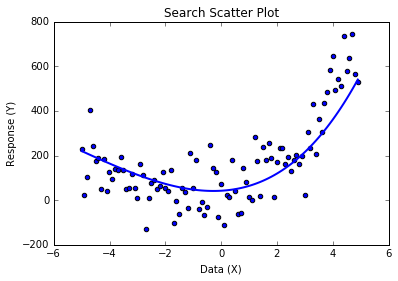

total iterations to convergence:
330847
total minutes to convergence:
0.969116667906


In [60]:
#### SOLVE FOR COEFFICIENTS USING GRADIENT DESCENT & LEAST SQUARES

import time
t0 = time.time()

# set N = size of dataset
N = X[:,1].size
N = float(N)

# initialize coefficients 
Bhat = np.matrix(np.array([1.0,1.0,1.0,1.0,1.0]))
Bhat = Bhat.transpose()
# initialize convergence flag
convergence_flag = 0
# initalize iteration counter
iterations = 0
# Set learning Rate
learning_rate = 1e-5
# Set L2 regularization
L2 = 1000

# convergence_flag == 0
# iterations < 20000000, 4000000
while (convergence_flag == 0):
    iterations = iterations + 1
    # compute RSS   
    residuals = Y-(X*Bhat)
    RS = np.square(residuals)
    RSS = RS.sum()
    # update coefficients:
    # intercept
    residuals = Y-(X*Bhat)
    derivative = residuals.sum()
    Bhat[0,:] = Bhat[0,:] + (1/(2*N))*(learning_rate)*(derivative)
    for i in range(1,len(Bhat)):
        derivative = residuals.transpose()*X[:,i]
        Bhat[i,:] = (1-2*learning_rate*L2)*Bhat[i,:] + (learning_rate)*(derivative)
        # 2nd degree
        #residual_sum = residuals.transpose()*X[:,2]
        #Bhat_new_2 = (1-2*learning_rate*L2)*Bhat[2,:] + (1/(2*N))*(learning_rate)*(residual_sum)    
    # check for convergence
    # compute RSS   
    residuals = Y-(X*Bhat)
    RS = np.square(residuals)
    RSS_new = RS.sum()
    if (abs(RSS_new-RSS)<0.001):
        convergence_flag = 1

# print estimated coefficients     
print "The estimated Coefficients are:"
print Bhat
# print true coefficients
print "The true Coefficients are:"
print B

plt.scatter(X[:,1], Y)
plt.plot(X[:,1], X*Bhat, linewidth=2.0)
plt.title('Search Scatter Plot')
plt.xlabel("Data (X)")
plt.ylabel("Response (Y)")
plt.show()

print "total iterations to convergence:"
print iterations

t1 = time.time()
total = t1-t0
print "total minutes to convergence:"
print total/60.0

### Our coefficients are smaller!

So our intercept is slightly larger but this is not surprising since we're softening the flexibility of our model by softening our coefficients overall.  Our other coefficients are definitely smaller and we can see our new model is not as flexible as our previous model.